# Water Quality Portal

In [1]:
import contextily as ctx
import geopandas as gpd
from pygeohydro import WaterQuality
from shapely.geometry import Point

In [2]:
SAVE_KWDS = {"bbox_inches": "tight", "dpi": 300, "facecolor": "w"}

The `WaterQuality` has a number of convenience methods to retrieve data from the
web service. Since there are many parameter combinations that can be
used to retrieve data, a general method is provided to retrieve data from
any of the valid endpoints. You can use `get_json` to retrieve stations info
as a `geopandas.GeoDataFrame` or `get_csv` to retrieve stations data as a
`pandas.DataFrame`. You can construct a dictionary of the parameters and pass
it to one of these functions. For more information on the parameters, please
consult the [Water Quality Data documentation](https://www.waterqualitydata.us/webservices_documentation).
For example, let's find all the stations within a bounding box that have Caffeine data:

In [3]:
wq = WaterQuality()
stations = wq.station_bybbox((-92.8, 44.2, -88.9, 46.0), {"characteristicName": "Caffeine"})

Or the same criterion but within a 30 mile radius of a point:

In [4]:
stations = wq.station_bydistance(-92.8, 44.2, 30, {"characteristicName": "Caffeine"})

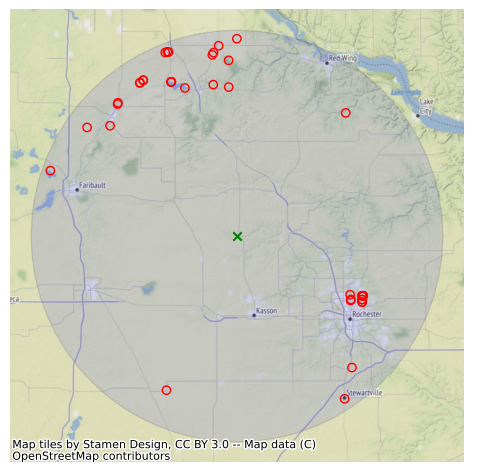

In [5]:
point = gpd.GeoSeries([Point(-92.8, 44.2)], crs="epsg:4326")
point = point.to_crs(point.estimate_utm_crs())
buff = point.buffer(30 * 1609.344)

ax = buff.plot(color="b", edgecolor="black", alpha=0.1, figsize=(6, 6))
point.plot(ax=ax, color="g", marker="x")
stations.to_crs(buff.crs).plot(ax=ax, color="r", marker="o", facecolor="none")
ctx.add_basemap(ax, crs=buff.crs)
ax.set_axis_off()
ax.margins(0)
ax.figure.set_dpi(100)
ax.figure.savefig("_static/water_quality.png", **SAVE_KWDS)

Then we can get for al these stations the data like this:

In [6]:
sids = stations.MonitoringLocationIdentifier.tolist()
caff = wq.data_bystation(sids, {"characteristicName": "Caffeine"})
caff.head()

,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityTypeCode,ActivityMediaName,ActivityMediaSubdivisionName,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,ActivityEndDate,...,ResultAnalyticalMethod/MethodName,MethodDescriptionText,LaboratoryName,AnalysisStartDate,ResultLaboratoryCommentText,DetectionQuantitationLimitTypeName,DetectionQuantitationLimitMeasure/MeasureValue,DetectionQuantitationLimitMeasure/MeasureUnitCode,PreparationStartDate,ProviderName
0,USGS-MN,USGS Minnesota Water Science Center,nwismn.01.00400395,Sample-Routine,Water,Surface Water,2004-09-03,11:30:00,CDT,NaN,...,NWQL Schedule 1433,USGS WRI 01-4186,NaN,2004-11-13,NaN,Estimated Detection Level,0.50,ug/l,2004-09-16,NWIS
1,USGS-IA,USGS Iowa Water Science Center,nwisia.01.00700543,Sample-Routine,Water,Groundwater,2007-08-27,15:00:00,CDT,NaN,...,"Pest, polar, wf, spe, HPLC-MS",USGS WRI 01-4134,"USGS-National Water Quality Lab, Denver, CO",2007-09-12,NaN,Laboratory Reporting Level,0.04,ug/l,2007-09-04,NWIS
2,USGS-MN,USGS Minnesota Water Science Center,nwismn.01.00800189,Sample-Routine,Water,Groundwater,2008-04-23,12:30:00,CDT,NaN,...,NWQL Schedule 4433,USGS TMR 5-B4,"USGS-National Water Quality Lab, Denver, CO",2008-05-23,NaN,Estimated Detection Level,0.20,ug/l,2008-05-08,NWIS
3,USGS-MN,USGS Minnesota Water Science Center,nwismn.01.00800166,Sample-Routine,Water,Groundwater,2008-04-23,13:53:00,CDT,NaN,...,NWQL Schedule 4433,USGS TMR 5-B4,"USGS-National Water Quality Lab, Denver, CO",2008-05-26,NaN,Estimated Detection Level,0.20,ug/l,2008-05-08,NWIS
4,USGS-MN,USGS Minnesota Water Science Center,nwismn.01.00800206,Sample-Routine,Water,Groundwater,2008-04-23,13:30:00,CDT,NaN,...,NWQL Schedule 4433,USGS TMR 5-B4,"USGS-National Water Quality Lab, Denver, CO",2008-05-23,NaN,Estimated Detection Level,0.20,ug/l,2008-05-08,NWIS
